
Feature selection is a crucial step in the feature engineering process, aimed at identifying the most relevant subset of features from a dataset while discarding irrelevant or redundant ones. The primary goal is to improve the performance of machine learning models by reducing overfitting, improving computational efficiency, and enhancing interpretability.

Here's a detailed explanation of feature selection techniques:

**Filter Methods:**

- `Correlation Analysis`: This method assesses the strength of the linear relationship between each feature and the target variable or between pairs of features. Features with high correlation to the target variable are likely to be more informative for prediction tasks. Similarly, features with high pairwise correlation might be redundant, and one of them can be removed.
- `Statistical Tests`: Techniques like ANOVA (Analysis of Variance) or Chi-Square tests can be used to assess the statistical significance of each feature with respect to the target variable. Features with low statistical significance may be considered for removal.
- `Information Gain`: In the context of classification problems, information gain measures the reduction in entropy or uncertainty about the target variable when a particular feature is known. Features with high information gain are preferred.
- `Variance Thresholding`: Features with low variance may not contain much useful information for prediction tasks. By setting a threshold, features with variance below that threshold can be removed.

**Wrapper Methods:**

- `Forward Selection`: This method starts with an empty set of features and iteratively adds one feature at a time, selecting the one that results in the best model performance based on a chosen evaluation metric.
- `Backward Elimination`: In contrast to forward selection, backward elimination starts with all features and removes one feature at a time, selecting the one whose removal leads to the best model performance.
- `Recursive Feature Elimination (RFE)`: RFE is an iterative method that starts with all features and recursively removes the least important features based on model performance until the desired number of features is reached.

**Embedded Methods:**

- `Regularization Techniques`: Regularized models like Lasso (L1 regularization) and Ridge (L2 regularization) penalize the magnitude of coefficients associated with each feature. As a result, some coefficients are shrunk to zero, effectively performing feature selection.
- `Tree-Based Methods`: Decision tree-based algorithms like Random Forests and Gradient Boosting Machines naturally perform feature selection by selecting the most informative features at each split. Feature importance scores can be used to rank features and select the top ones.

**Dimensionality Reduction Techniques:**

- `Principal Component Analysis (PCA)`: PCA is primarily a dimensionality reduction technique but can indirectly perform feature selection by identifying orthogonal directions (principal components) in the feature space that capture the most variance. Features associated with principal components that explain a large portion of the variance can be considered important.
- `Linear Discriminant Analysis (LDA)`: LDA is a supervised dimensionality reduction technique that aims to find linear combinations of features that maximize class separability. Features associated with discriminant directions can be considered important for classification tasks.

When selecting features, it's essential to consider the trade-offs between model performance, computational efficiency, and interpretability. Additionally, the choice of feature selection method should be guided by the specific characteristics of the dataset and the goals of the modeling task. It's often beneficial to experiment with multiple techniques and evaluate their impact on model performance using appropriate validation methods.

# Filter Method:

## Correlation Analysis

Correlation analysis is a statistical technique used to measure the strength and direction of the relationship between two variables. In the context of feature selection, correlation analysis helps identify features that are highly correlated with the target variable or with each other. Let's delve deeper into correlation analysis with practical examples:

### Pearson Correlation Coefficient:

The Pearson correlation coefficient, denoted by ρ, ranges from -1 to 1, where:

- ρ=1 indicates a perfect positive linear relationship,
- ρ=−1 indicates a perfect negative linear relationship, and
- ρ=0 indicates no linear relationship between the variables.

Here's how you can perform correlation analysis using Pearson correlation coefficient:

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Compute Pearson correlation coefficient matrix
correlation_matrix = data.corr()

# Visualize correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Coefficient Matrix")
plt.show()

**Practical Examples:**

`Feature-Target Correlation`:

Suppose you have a dataset containing features like "Age", "Income", and "Education Level", and you want to predict "Loan Approval" (binary target). You can compute the Pearson correlation coefficient between each feature and the target variable to identify which features are most correlated with loan approval.

`Feature-Feature Correlation`:

In a dataset with features like "Temperature", "Humidity", and "Air Pressure", you can compute pairwise correlations between these features. High correlations between pairs of features might indicate redundancy, suggesting that one of the correlated features could be removed to simplify the model.


### Spearman Correlation Coefficient:

Spearman correlation coefficient is a non-parametric measure of correlation that assesses how well the relationship between two variables can be described using a monotonic function. It's useful when the relationship between variables is not necessarily linear.

Here's how you can perform correlation analysis using Spearman correlation coefficient:

In [ ]:
# Compute Spearman correlation coefficient matrix
spearman_correlation_matrix = data.corr(method='spearman')

**Practical Examples:**

`Ordinal Data`:

If you have ordinal variables like "Ranking" or "Rating", Spearman correlation can be more appropriate as it doesn't assume a linear relationship.

`Non-Normal Data`:

When dealing with non-normally distributed variables, Spearman correlation can be more robust compared to Pearson correlation.

## Statistical Tests

Statistical tests are used in feature selection to assess the significance of the relationship between features and the target variable or between pairs of features. These tests help determine whether the observed associations are statistically meaningful or occurred by chance. Let's explore some common statistical tests used in feature selection with practical examples:

### 1. ANOVA (Analysis of Variance):

**Purpose:** ANOVA is used to compare means across multiple groups to determine if there are statistically significant differences between them.

**Practical Example:** Suppose you have a dataset with a categorical feature "Region" (e.g., North, South, East, West) and a continuous target variable "Sales." You can perform ANOVA to test if there are significant differences in sales across different regions.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Perform ANOVA
grouped_data = [data[data['Region'] == region]['Sales'] for region in data['Region'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Check significance
alpha = 0.05
if p_value < alpha:
    print("ANOVA: There are significant differences in sales across regions.")
else:
    print("ANOVA: There are no significant differences in sales across regions.")


### 2. Chi-Square Test:

**Purpose:** Chi-Square test is used to determine if there is a significant association between two categorical variables.

**Practical Example:** Consider a dataset with two categorical variables "Gender" and "Smoker," where "Gender" has levels Male/Female and "Smoker" has levels Yes/No. You can perform a Chi-Square test to assess if there's a significant association between gender and smoking habits.

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(data['Gender'], data['Smoker'])

# Perform Chi-Square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Check significance
if p_value < alpha:
    print("Chi-Square Test: There is a significant association between Gender and Smoking Habits.")
else:
    print("Chi-Square Test: There is no significant association between Gender and Smoking Habits.")


### 3. T-Test:

**Purpose:** T-test is used to determine if there is a significant difference between the means of two groups.

**Practical Example:** Suppose you have a dataset with a binary categorical variable "Group" (e.g., Control, Experimental) and a continuous target variable "Performance." You can perform a T-test to assess if there's a significant difference in performance between the control and experimental groups.

In [ ]:
from scipy.stats import ttest_ind

# Perform T-test
control_group = data[data['Group'] == 'Control']['Performance']
experimental_group = data[data['Group'] == 'Experimental']['Performance']
t_statistic, p_value = ttest_ind(control_group, experimental_group)

# Check significance
if p_value < alpha:
    print("T-Test: There is a significant difference in performance between Control and Experimental groups.")
else:
    print("T-Test: There is no significant difference in performance between Control and Experimental groups.")


Statistical tests provide quantitative measures of the significance of relationships between variables, aiding in feature selection by identifying features that are most relevant to the target variable. By applying appropriate statistical tests, you can prioritize features that contribute significantly to the predictive power of machine learning models, ultimately improving their performance and 

## Information Gain

Information Gain is a concept from information theory, commonly used in feature selection for classification tasks. It measures the reduction in entropy or uncertainty about the target variable when a particular feature is known. Features with high information gain are considered more informative for predicting the target variable. Let's delve into Information Gain with a practical example:

**Practical Example:**

Suppose you have a dataset containing information about customers and whether they purchased a product ("Purchase" - Yes/No). The dataset includes features such as "Age," "Gender," "Income," and "Education Level." Your goal is to predict whether a customer will purchase the product based on these features.

Here's how you can calculate Information Gain for each feature:
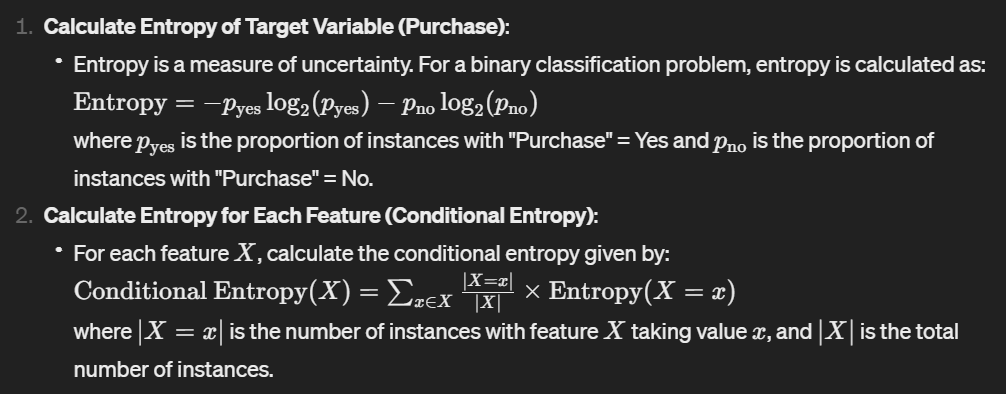

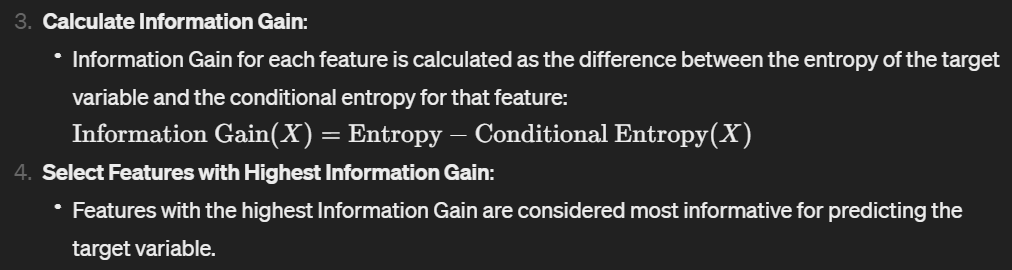

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Calculate entropy of target variable
def entropy(data):
    p_yes = (data['Purchase'] == 'Yes').mean()
    p_no = 1 - p_yes
    return -(p_yes * np.log2(p_yes) + p_no * np.log2(p_no))

target_entropy = entropy(data)

# Calculate conditional entropy for each feature
conditional_entropy = {}
for feature in data.columns[:-1]:  # Exclude target variable
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropies = [(count / len(data)) * entropy(data[data[feature] == value]) for value, count in zip(values, counts)]
    conditional_entropy[feature] = sum(weighted_entropies)

# Calculate information gain
information_gain = {feature: target_entropy - conditional_entropy[feature] for feature in conditional_entropy}

# Sort features by information gain
sorted_features = sorted(information_gain.items(), key=lambda x: x[1], reverse=True)

# Print feature ranking
print("Feature Ranking (Highest to Lowest Information Gain):")
for feature, gain in sorted_features:
    print(f"{feature}: {gain}")


Information Gain provides a measure of the relevance of features for predicting the target variable in classification tasks. By calculating Information Gain for each feature, you can prioritize features that contribute the most to reducing the uncertainty about the target variable, thereby improving the performance of your classification models.

## Variance thresholding

Variance thresholding is a simple feature selection method that removes features with low variance. The intuition behind this method is that features with low variance are approximately constant and thus less informative for predictive modeling tasks. Variance thresholding is particularly useful for datasets with numerical features of varying scales. Let's explore variance thresholding with a practical example:

**Practical Example:**

Suppose you have a dataset containing information about students, including features such as "Age," "Height," "Weight," and "Test Score." Your goal is to predict whether a student will pass or fail a test based on these features.

Here's how you can perform variance thresholding to remove low-variance features:

1. Compute Variance of Each Feature:
    - Calculate the variance of each numerical feature in the dataset. Variance measures the spread or variability of data points around the mean.
    
2. Set Threshold:
    - Choose a threshold value below which features will be considered low-variance and thus candidates for removal.

3. Remove Low-Variance Features:
    - Remove features with variance below the chosen threshold.

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Target"])
y = data["Target"]

# Initialize VarianceThreshold object with threshold value
threshold = 0.1  # Example threshold value (you can adjust)
selector = VarianceThreshold(threshold)

# Fit to data, transform features
X_selected = selector.fit_transform(X)

# Get mask of features selected
selected_mask = selector.get_support()

# Get names of selected features
selected_features = X.columns[selected_mask]

# Print selected features
print("Selected Features:")
print(selected_features)


Variance thresholding is a straightforward method for feature selection that is particularly useful for datasets with many numerical features. By removing low-variance features, you can reduce the dimensionality of the dataset and potentially improve the performance of machine learning models. However, it's essential to choose an appropriate threshold value based on domain knowledge and the characteristics of the dataset to ensure that informative features are retained while irrelevant ones are removed.

# Wrapper method:

## Forward Selection

Forward selection is a wrapper method for feature selection that iteratively builds a model by adding one feature at a time. At each iteration, the feature that yields the best performance improvement is selected and added to the model. This process continues until a stopping criterion is met, such as reaching a predetermined number of features or when further addition of features no longer improves model performance. Let's delve into forward selection with a practical example:

**Practical Example:**

Suppose you have a dataset containing various features such as "Age," "Income," "Education Level," and "Work Experience," and a binary target variable indicating whether a person will purchase a product ("Purchase" - Yes/No). Your goal is to predict whether a person will purchase the product based on these features.

Here's how you can perform forward selection:

1. Initialize an Empty Set of Selected Features:
    - Start with an empty set of selected features.

2. Iterate Through Features:
    - Iterate through each feature not yet selected.

3. Add One Feature at a Time:
    - Add one feature at a time to the set of selected features.

4. Train Model:
    - Train a model using only the selected features.

5. Evaluate Model Performance:
    - Evaluate the model's performance using a chosen evaluation metric (e.g., accuracy, F1-score, ROC-AUC).

6. Select Best Performing Feature:
    - Identify the feature that, when added to the selected set, yields the highest performance improvement.

7. Repeat Steps 3-6:
    - Repeat steps 3 to 6 until a stopping criterion is met (e.g., reaching a maximum number of features or no further improvement in model performance).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Purchase"])
y = data["Purchase"]

# Initialize an empty set of selected features
selected_features = []
best_score = 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue forward selection until a stopping criterion is met
while len(selected_features) < len(X.columns):
    # Initialize variables to track best feature and its performance
    best_feature = None
    best_model = None
    best_score = 0
    
    # Iterate through features not yet selected
    for feature in X.columns:
        if feature not in selected_features:
            # Create a new set of selected features
            features_to_use = selected_features + [feature]
            
            # Train a model using only the selected features
            model = LogisticRegression()
            model.fit(X_train[features_to_use], y_train)
            
            # Evaluate model performance on the test set
            y_pred = model.predict(X_test[features_to_use])
            score = accuracy_score(y_test, y_pred)
            
            # Update best feature and its performance
            if score > best_score:
                best_score = score
                best_feature = feature
                best_model = model
    
    # Add the best feature to the set of selected features
    selected_features.append(best_feature)
    
    # Update the model to the best model found so far
    model = best_model

# Print selected features
print("Selected Features:")
print(selected_features)


Forward selection is an iterative method for feature selection that gradually builds a model by adding one feature at a time. It's a computationally intensive process but can yield good results, especially when the number of features is not too large. By selecting features based on their contribution to model performance, forward selection helps identify the most relevant subset of features for predictive modeling tasks.

## Backward elimination

Backward elimination is another wrapper method for feature selection that starts with a model containing all features and iteratively removes the least significant feature(s) based on some criterion until a stopping criterion is met. This method aims to eliminate features that contribute the least to the model's performance. Let's explore backward elimination with a practical example:

**Practical Example:**

Suppose you have a dataset containing various features such as "Age," "Income," "Education Level," and "Work Experience," and a binary target variable indicating whether a person will purchase a product ("Purchase" - Yes/No). Your goal is to predict whether a person will purchase the product based on these features.

Here's how you can perform backward elimination:

1. Initialize Model with All Features:
    - Start with a model containing all features.
    
2. Train Model:
    - Train a model using all features.

3. Evaluate Model Performance:
    - Evaluate the model's performance using a chosen evaluation metric (e.g., accuracy, F1-score, ROC-AUC).

4. Remove Least Significant Feature:
    - Identify the least significant feature(s) based on some criterion (e.g., p-value, feature importance).

5. Refit Model:
    - Refit the model without the least significant feature(s).

6. Repeat Steps 3-5:
    - Repeat steps 3 to 5 until a stopping criterion is met (e.g., all features are statistically significant, further removal of features does not improve model performance).

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Purchase"])
y = data["Purchase"]

# Add constant to the features (required for statsmodels)
X = sm.add_constant(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model with all features
model = sm.Logit(y_train, X_train)

# Fit the model
result = model.fit()

# Print summary of the model
print(result.summary())

# Perform backward elimination
selected_features = list(X.columns)
while len(selected_features) > 0:
    # Fit the model
    model = sm.Logit(y_train, X_train[selected_features])
    result = model.fit()

    # Print summary of the model
    print(result.summary())
    
    # Check for features to remove
    p_values = result.pvalues.drop('const')  # Drop the constant term
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        # Remove the feature with the highest p-value
        feature_to_remove = p_values.idxmax()
        selected_features.remove(feature_to_remove)
        print(f"Removed feature: {feature_to_remove}")
    else:
        break

# Print selected features
print("Selected Features:")
print(selected_features)


Backward elimination is an iterative method for feature selection that gradually reduces the feature set by removing the least significant feature(s) at each iteration. It's a powerful technique for identifying the most relevant subset of features for predictive modeling tasks. By iteratively refitting the model and evaluating feature significance, backward elimination helps eliminate redundant or irrelevant features, improving model interpretability and performance.

## Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a wrapper method for feature selection that selects features by recursively considering smaller and smaller sets of features. It works by recursively removing attributes and building a model on the remaining attributes. It then ranks the features based on their importance and eliminates the least important features, repeating this process until the desired number of features is reached. Let's delve into Recursive Feature Elimination with a practical example:

**Practical Example:**

Suppose you have a dataset containing various features such as "Age," "Income," "Education Level," and "Work Experience," and a binary target variable indicating whether a person will purchase a product ("Purchase" - Yes/No). Your goal is to predict whether a person will purchase the product based on these features.

Here's how you can perform Recursive Feature Elimination:

1. Initialize Model:
    - Choose a machine learning model that assigns importance to features (e.g., linear models, tree-based models).

2. Train Model with All Features:
    - Train the model using all features in the dataset.

3. Rank Features:
    - Rank the features based on their importance scores obtained from the trained model.

4. Remove Least Important Feature:
    - Remove the feature with the lowest importance score.

5. Refit Model:
    - Refit the model using the remaining features.

6. Repeat Steps 3-5:
    - Repeat steps 3 to 5 until the desired number of features is reached.

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Purchase"])
y = data["Purchase"]

# Initialize the estimator (e.g., logistic regression)
estimator = LogisticRegression()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=3)  # Select 3 features

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:")
print(selected_features)


Recursive Feature Elimination is a powerful technique for feature selection that iteratively removes the least important features until the desired number of features is reached. It leverages the importance scores assigned to features by a machine learning model to guide the selection process, making it particularly useful for models that inherently assign importance to features, such as linear models and tree-based models. By selecting the most relevant subset of features, RFE helps improve model interpretability and generalization performance.

# Embedded Methods:

## Regularization techniques 

Regularization techniques are a type of embedded method for feature selection, where feature selection is incorporated into the model training process itself. Regularization adds a penalty term to the model's objective function, encouraging the model to select a subset of features that are most relevant while penalizing complexity. Two common types of regularization techniques are Lasso (L1 regularization) and Ridge (L2 regularization). Let's explore these techniques with practical examples:

### Lasso (L1 Regularization):

Lasso adds the sum of the absolute values of the coefficients multiplied by a regularization parameter (alpha) to the model's objective function. This encourages sparsity in the coefficient vector, effectively performing feature selection by setting some coefficients to zero.

**Practical Example:**

Suppose you have a dataset with features like "Age," "Income," "Education Level," and "Work Experience," and a binary target variable indicating whether a person will purchase a product ("Purchase" - Yes/No). You want to train a logistic regression model with Lasso regularization to predict purchases.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Purchase"])
y = data["Purchase"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model with Lasso regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C is the inverse of regularization strength
model.fit(X_train_scaled, y_train)

# Get selected features (coefficients)
selected_features = X.columns[model.coef_[0] != 0]

# Print selected features
print("Selected Features:")
print(selected_features)


### Ridge (L2 Regularization):

Ridge adds the sum of the squared values of the coefficients multiplied by a regularization parameter (alpha) to the model's objective function. Unlike Lasso, Ridge tends to shrink the coefficients towards zero without setting them exactly to zero, leading to less sparse solutions.

**Practical Example:**

Using the same dataset and problem setup as before, let's train a logistic regression model with Ridge regularization.

In [ ]:
# Train logistic regression model with Ridge regularization
model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # C is the inverse of regularization strength
model.fit(X_train_scaled, y_train)

# Get selected features (non-zero coefficients)
selected_features = X.columns[model.coef_[0] != 0]

# Print selected features
print("Selected Features:")
print(selected_features)


Regularization techniques like Lasso and Ridge are powerful methods for feature selection as they simultaneously perform model training and feature selection. By penalizing the magnitude of coefficients, these techniques encourage the model to focus on the most important features while avoiding overfitting. When choosing between Lasso and Ridge, consider the trade-off between sparsity (Lasso) and stability (Ridge) in the selected features. Adjusting the regularization parameter (alpha or C) allows you to control the strength of regularization and the number of selected features.

## Tree-Based Methods

Tree-based methods are a type of embedded feature selection technique commonly used in decision trees and ensemble methods such as Random Forests and Gradient Boosting Machines (GBMs). These methods inherently perform feature selection by selecting the most informative features to split on during the tree-building process. Let's delve into tree-based methods with practical examples:

### Random Forest Feature Importance:

Random Forests are an ensemble learning method that builds multiple decision trees and averages their predictions. One of the key advantages of Random Forests is their ability to assess feature importance. Feature importance scores are computed based on how much each feature decreases impurity across all decision trees in the forest.

**Practical Example:**

Suppose you have a dataset with features like "Age," "Income," "Education Level," and "Work Experience," and a binary target variable indicating whether a person will purchase a product ("Purchase" - Yes/No). You want to train a Random Forest classifier and assess feature importance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Purchase"])
y = data["Purchase"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print feature importances
print("Feature Importance:")
print(importance_df)


### Gradient Boosting Feature Importance:

Gradient Boosting Machines (GBMs) are another ensemble method that builds trees sequentially, where each subsequent tree learns from the mistakes of the previous ones. Similar to Random Forests, GBMs can also provide feature importance scores based on how much each feature contributes to the improvement of the model's performance.

**Practical Example:**

Using the same dataset and problem setup as before, let's train a Gradient Boosting classifier and assess feature importance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print feature importances
print("Feature Importance:")
print(importance_df)


Tree-based methods are powerful for feature selection as they inherently assess feature importance during the model training process. Features that are more informative for predicting the target variable tend to have higher importance scores. By analyzing feature importance scores, you can identify the most relevant features for predictive modeling tasks, improving model interpretability and potentially reducing dimensionality.

# Dimensionality Reduction Techniques:

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used for feature extraction and data visualization. PCA transforms high-dimensional data into a lower-dimensional space while preserving as much of the variance in the original data as possible. It achieves this by identifying the principal components, which are orthogonal vectors that point in the directions of maximum variance in the data. Let's explore PCA with a practical example:

**Practical Example:**

Suppose you have a dataset containing information about students, including features such as "Math Score," "Reading Score," "Writing Score," "Hours Studied," and "Extracurricular Activities." Your goal is to reduce the dimensionality of the dataset for visualization and analysis purposes.

Here's how you can perform PCA:

1. Standardize the Data:
    - It is essential to standardize the features to have mean 0 and standard deviation 1 to ensure that each feature contributes equally to the analysis.

2. Compute the Covariance Matrix:
    - Calculate the covariance matrix of the standardized data. The covariance matrix provides information about the relationships between different features.

3. Compute Eigenvectors and Eigenvalues:
    - Compute the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, while eigenvalues represent the magnitude of variance along these directions.

4. Select Principal Components:
    - Sort the eigenvectors by their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues are the principal components.

5. Project Data onto Principal Components:
    - Project the original data onto the principal components to obtain the transformed dataset in the lower-dimensional space.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable (if applicable)
X = data.drop(columns=["Target"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=2)  # Number of principal components to retain

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=["Principal Component 1", "Principal Component 2"])

# Concatenate PCA results with target variable (if applicable)
# pca_df = pd.concat([pca_df, data["Target"]], axis=1)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print PCA DataFrame
print("PCA DataFrame:")
print(pca_df)


Principal Component Analysis (PCA) is a powerful dimensionality reduction technique commonly used for feature extraction, data visualization, and noise reduction. By identifying the principal components that capture the most variance in the data, PCA allows for the representation of high-dimensional data in a lower-dimensional space. This facilitates easier visualization and analysis of complex datasets while retaining as much information as possible.

## Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique commonly used for feature extraction and classification. Unlike PCA, which focuses on maximizing variance, LDA aims to find the linear combinations of features that best separate different classes in the data. It achieves this by maximizing the between-class scatter while minimizing the within-class scatter. LDA is particularly useful when the goal is to find the features that best discriminate between different classes in a supervised learning setting. Let's explore LDA with a practical example:

**Practical Example:**

Suppose you have a dataset containing information about students, including features such as "Math Score," "Reading Score," "Writing Score," and a categorical target variable indicating whether a student passed or failed ("Pass" or "Fail"). Your goal is to reduce the dimensionality of the dataset while preserving the discriminative information between the two classes.

Here's how you can perform Linear Discriminant Analysis (LDA):

1. Standardize the Data:
    - Standardize the features to have mean 0 and standard deviation 1. This step ensures that each feature contributes equally to the analysis.

2. Compute Class Means:
    - Calculate the mean vector for each class. These represent the centroids of the data points belonging to each class.

3. Compute Within-Class Scatter Matrix:
    - Compute the scatter matrix for each class, which measures the spread of data points within each class.

4. Compute Between-Class Scatter Matrix:
    - Compute the scatter matrix that measures the spread of class centroids around the overall mean.

5. Compute Eigenvectors and Eigenvalues:
    - Compute the eigenvectors and eigenvalues of the matrix obtained by taking the inverse of the within-class scatter matrix multiplied by the between-class scatter matrix.

6. Select Principal Components:
    - Sort the eigenvectors by their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues are the principal components.

7. Project Data onto Principal Components:
    - Project the original data onto the principal components to obtain the transformed dataset in the lower-dimensional space.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = data.drop(columns=["Target"])
y = data["Target"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Number of discriminant components to retain

# Fit and transform the data
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda, columns=["Linear Discriminant 1"])

# Concatenate LDA results with target variable
lda_df = pd.concat([lda_df, y], axis=1)

# Print LDA DataFrame
print("LDA DataFrame:")
print(lda_df)


Linear Discriminant Analysis (LDA) is a powerful dimensionality reduction technique commonly used for feature extraction and classification tasks. By identifying the linear combinations of features that best separate different classes in the data, LDA allows for the creation of lower-dimensional representations that retain the most discriminative information. This facilitates easier visualization, analysis, and classification of complex datasets in a supervised learning setting.